# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

637

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# COUNTER
cities_count = len(cities)

# CREATE EMPTY LIST TO HOLD DESIRED DATA- CITY, TEMP, HUMIDITY, ETC.
City = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lng = []
Max_Temp = []
Wind_Speed = []

# OPEN WEATHER URL
url = "http://api.openweathermap.org/data/2.5/weather?"
#query_url = url + "appid=" + weather_api_key + "&q=" + city

# SET UP PRINT LOG
print("PRINT LOG OF CITIES PROCESSED")
print("------------------------------")

#ITERATE THROUGH CITY DATA WITH FOR LOOP
for x in range(cities_count):
    print(f"Processing Record {x} | {cities[x]}.")
    params = {"q":cities[x],
                  "units":"imperial",
                "appid":weather_api_key}
    try:      
        response = requests.get(url, params=params)
        response_json = response.json()
    
        # APPEND JSON DATA TO DESIGNATED LISTS
        City.append(response_json['name'])
        Cloudiness.append(response_json['clouds']['all'])
        Country.append(response_json['sys']['country'])
        Date.append(response_json['dt'])
        Humidity.append(response_json['main']['humidity'])
        Lat.append(response_json['coord']['lat'])
        Lng.append(response_json['coord']['lon'])
        Max_Temp.append(response_json['main']['temp_max'])
        Wind_Speed.append(response_json['wind']['speed'])
        
    except:
        print('City not found. Skipping...')

print('-----------------------------')
print('DATA RETRIEVAL COMPLETE')
print('-----------------------------')
        

PRINT LOG OF CITIES PROCESSED
------------------------------
Processing Record 0 | atuona.
Processing Record 1 | saint-augustin.
Processing Record 2 | lebu.
Processing Record 3 | vila velha.
Processing Record 4 | busselton.
Processing Record 5 | yuli.
Processing Record 6 | hobart.
Processing Record 7 | saleaula.
City not found. Skipping...
Processing Record 8 | pangnirtung.
Processing Record 9 | bluff.
Processing Record 10 | coquimbo.
Processing Record 11 | krasnoborsk.
Processing Record 12 | bethel.
Processing Record 13 | rikitea.
Processing Record 14 | port elizabeth.
Processing Record 15 | ejido.
Processing Record 16 | axim.
Processing Record 17 | hay river.
Processing Record 18 | nouadhibou.
Processing Record 19 | tuktoyaktuk.
Processing Record 20 | belushya guba.
City not found. Skipping...
Processing Record 21 | vila franca do campo.
Processing Record 22 | te anau.
Processing Record 23 | matara.
Processing Record 24 | arlit.
Processing Record 25 | albany.
Processing Record 26 | c

City not found. Skipping...
Processing Record 224 | newport.
Processing Record 225 | hendaye.
Processing Record 226 | tessalit.
Processing Record 227 | shenjiamen.
Processing Record 228 | sao filipe.
Processing Record 229 | challapata.
Processing Record 230 | sitka.
Processing Record 231 | pevek.
Processing Record 232 | hirado.
Processing Record 233 | auki.
Processing Record 234 | nikolskoye.
Processing Record 235 | alabushevo.
Processing Record 236 | umm lajj.
Processing Record 237 | ancud.
Processing Record 238 | isabela.
Processing Record 239 | rungata.
City not found. Skipping...
Processing Record 240 | key west.
Processing Record 241 | hambantota.
Processing Record 242 | imbituba.
Processing Record 243 | tambovka.
Processing Record 244 | paamiut.
Processing Record 245 | visnes.
Processing Record 246 | balkhash.
Processing Record 247 | huarmey.
Processing Record 248 | cleethorpes.
Processing Record 249 | potters bar.
Processing Record 250 | tsihombe.
City not found. Skipping...
Pro

Processing Record 451 | port-gentil.
Processing Record 452 | makurdi.
Processing Record 453 | rusape.
Processing Record 454 | waingapu.
Processing Record 455 | edd.
Processing Record 456 | krasnyy tekstilshchik.
City not found. Skipping...
Processing Record 457 | qena.
Processing Record 458 | isugod.
Processing Record 459 | acapulco.
Processing Record 460 | jalu.
Processing Record 461 | tateyama.
Processing Record 462 | lubumbashi.
Processing Record 463 | kununurra.
Processing Record 464 | usinsk.
Processing Record 465 | cap-aux-meules.
Processing Record 466 | ekhabi.
Processing Record 467 | singaraja.
Processing Record 468 | formoso do araguaia.
City not found. Skipping...
Processing Record 469 | keshabpur.
Processing Record 470 | riviere-au-renard.
Processing Record 471 | vao.
Processing Record 472 | khatanga.
Processing Record 473 | tomatlan.
Processing Record 474 | mokhsogollokh.
Processing Record 475 | kirkwall.
Processing Record 476 | gat.
Processing Record 477 | yongan.
Processi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# CREATE DF USING DATA IN LISTS
weather_data = {
    "City": City, "Lat": Lat, "Lng": Lng, "Max Temp": Max_Temp, 
    "Humidity" : Humidity, "Cloudiness": Cloudiness, "Wind Speed": Wind_Speed,
    "Country": Country, "Date": Date
}
weather_data_df = pd.DataFrame(weather_data)
weather_data_df = weather_data_df.()
weather_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Atuona,-9.80,-139.03,79.32,76,5,16.58,PF,1594850166
1,Saint-Augustin,51.23,-58.65,59.81,50,1,8.99,CA,1594850669
2,Lebu,-37.62,-73.65,52.12,91,100,0.60,CL,1594850670
3,Vila Velha,-20.33,-40.29,69.80,88,90,8.05,BR,1594850670
4,Busselton,-33.65,115.33,59.00,94,34,22.93,AU,1594850670


In [6]:
# FINAL LENGTH OF TABLE
len(weather_data_df)

592

In [10]:
# EXPORT DATA TO CSV
weather_data_df.to_csv("../output_data/cities.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
# ISOLATE CITIES WITH HUMIDITY > 100%
humidity_over_100 = weather_data_df.loc[weather_data_df['Humidity'] > 100]

humidity_count = len(humidity_over_100)
print(f"Cities with humidity > 100% = {humidity_count}")

Cities with humidity > 100% = 0


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

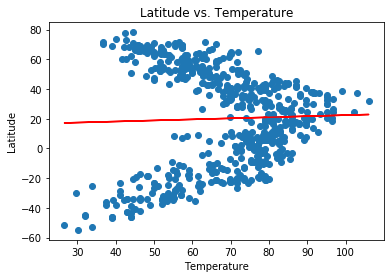

In [13]:
# SETUP PLOT FIGURE
fig, ax1 = plt.subplots(figsize=(6,4))

# SET LABELS
x_values = weather_data_df['Max Temp']
y_values = weather_data_df['Lat']
ax1.set_xlabel('Temperature')
ax1.set_ylabel('Latitude')
ax1.set_title('Latitude vs. Temperature')

plt.scatter(x_values, y_values)

# LINEAR REGRESSION
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

plt.savefig("Scatter1.png", bbox_inches='tight', dpi=600)

Based on the sample, it appers that most of the hotter temperatures exist north of the equator (0). Also, colder temperatures are experienced sooner when moving south of the equater than if one moves north-- i.e. Temp of 50 degrees is experienced between -40 and -50 lat in the southern hemisphere, but between 60 and 70 lat in the northern hemisphere.

## Latitude vs. Humidity Plot

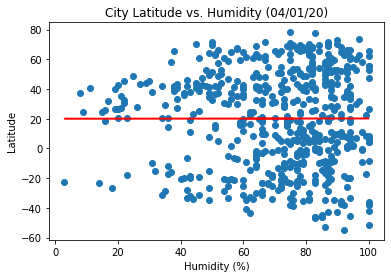

In [14]:
# SETUP PLOT FIGURE
fig, ax2 = plt.subplots(figsize=(6,4))

# SET LABELS
x_values = weather_data_df['Humidity']
y_values = weather_data_df['Lat']
ax2.set_xlabel('Humidity (%)')
ax2.set_ylabel('Latitude')
ax2.set_title('City Latitude vs. Humidity (04/01/20)')

plt.scatter(x_values, y_values)

# LINEAR REGRESSION
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

plt.savefig("Scatter2.png", bbox_inches='tight', dpi=600)

Based on the sample, it appears that there are more cities with lower humidity in the northern hemisphere.

## Latitude vs. Cloudiness Plot

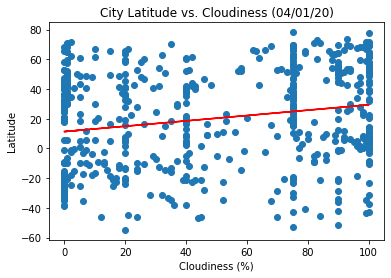

In [15]:
# SETUP PLOT FIGURE
fig, ax3 = plt.subplots(figsize=(6,4))

# SET LABELS
x_values = weather_data_df['Cloudiness']
y_values = weather_data_df['Lat']
ax3.set_xlabel('Cloudiness (%)')
ax3.set_ylabel('Latitude')
ax3.set_title('City Latitude vs. Cloudiness (04/01/20)')

plt.scatter(x_values, y_values)

# LINEAR REGRESSION
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

plt.savefig("Scatter3.png", bbox_inches='tight', dpi=600)

Based on the sample, it appears that though cities in both hemispheres experience all percentages of cloudiness, there is more cloudiness the further north in latitude one moves.

## Latitude vs. Wind Speed Plot

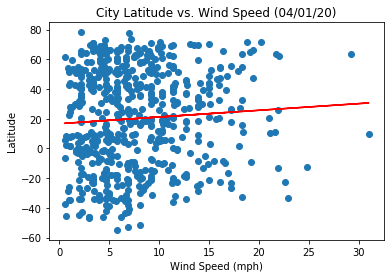

In [16]:
# SETUP PLOT FIGURE
fig, ax4 = plt.subplots(figsize=(6,4))

# SET LABELS
x_values = weather_data_df['Wind Speed']
y_values = weather_data_df['Lat']
ax4.set_xlabel('Wind Speed (mph)')
ax4.set_ylabel('Latitude')
ax4.set_title('City Latitude vs. Wind Speed (04/01/20)')

plt.scatter(x_values, y_values)

# LINEAR REGRESSION
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

plt.savefig("Scatter4.png", bbox_inches='tight', dpi=600)

Based on the sample, it appears that wind speed is evenly distributed accros latitudes.

## Linear Regression

In [17]:
# Create Northern and Southern Hemisphere DataFrames
northern_weather_df = weather_data_df.loc[weather_data_df['Lat'] > 0]
southern_weather_df = weather_data_df.loc[weather_data_df['Lat'] < 0 ]

In [18]:
northern_weather_df.head(2).style.set_caption('Northern Weather Hemisphere')

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Saint-Augustin,51.23,-58.65,59.81,50,1,8.99,CA,1594850669
5,Yuli,9.7,10.27,74.37,89,80,5.14,NG,1594850670


In [19]:
southern_weather_df.head(2).style.set_caption('Southern Weather Hemisphere')

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Atuona,-9.8,-139.03,79.32,76,5,16.58,PF,1594850166
2,Lebu,-37.62,-73.65,52.12,91,100,0.6,CL,1594850670


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.47094907917667544


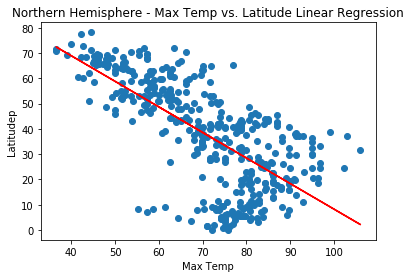

In [20]:
# SETUP PLOT FIGURE
fig, ax5 = plt.subplots(figsize=(6,4))

# SET LABELS
x_values = northern_weather_df['Max Temp']
y_values = northern_weather_df['Lat']
ax5.set_xlabel('Max Temp')
ax5.set_ylabel('Latitudep')
ax5.set_title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')


plt.scatter(x_values, y_values)

# LINEAR REGRESSION
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

plt.savefig("Scatter5.png", bbox_inches='tight', dpi=600)

print(f"The r-squared is: {rvalue**2}")

Based on the sample, it appears that the closer one moves to the equator, the highter the temperature.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6615652647377698


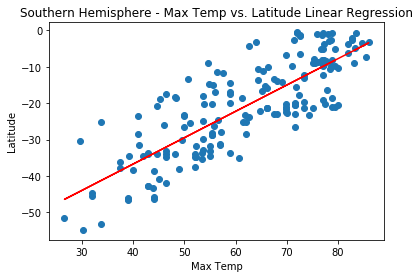

In [21]:
# SETUP PLOT FIGURE
fig, ax6 = plt.subplots(figsize=(6,4))

# SET LABELS
x_values = southern_weather_df['Max Temp']
y_values = southern_weather_df['Lat']
ax6.set_xlabel('Max Temp')
ax6.set_ylabel('Latitude')
ax6.set_title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')

plt.scatter(x_values, y_values)

# LINEAR REGRESSION
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

plt.savefig("Scatter6.png", bbox_inches='tight', dpi=600)

print(f"The r-squared is: {rvalue**2}")

Based on the sample, it appears that the closer one moves to the equator, the highter the temperature.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 2.4132805669465335e-05


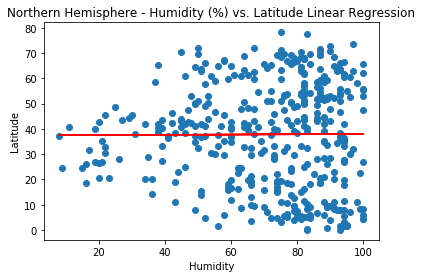

In [22]:
# SETUP PLOT FIGURE
fig, ax7 = plt.subplots(figsize=(6,4))

# SET LABELS
x_values = northern_weather_df['Humidity']
y_values = northern_weather_df['Lat']
ax7.set_xlabel('Humidity')
ax7.set_ylabel('Latitude')
ax7.set_title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')

plt.scatter(x_values, y_values)

# LINEAR REGRESSION
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

plt.savefig("Scatter7.png", bbox_inches='tight', dpi=600)

print(f"The r-squared is: {rvalue**2}")

Based on the sample, it appears that, at all latitudes, humidity increases as temperature increases.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0029187433300653853


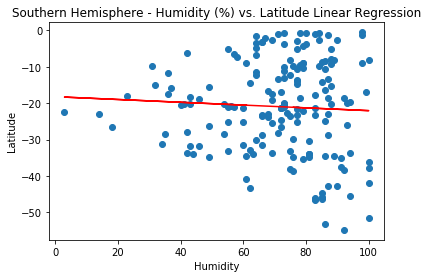

In [26]:
# SETUP PLOT FIGURE
fig, ax8 = plt.subplots(figsize=(6,4))

# SET LABELS
x_values = southern_weather_df['Humidity']
y_values = southern_weather_df['Lat']
ax8.set_xlabel('Humidity')
ax8.set_ylabel('Latitude')
ax8.set_title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')

plt.scatter(x_values, y_values)

# LINEAR REGRESSION
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

plt.savefig("Scatter8.png", bbox_inches='tight', dpi=600)

print(f"The r-squared is: {rvalue**2}")

Based on the sample, it appears that, at all latitudes, humidity increases as temperature increases.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.002322370134057911


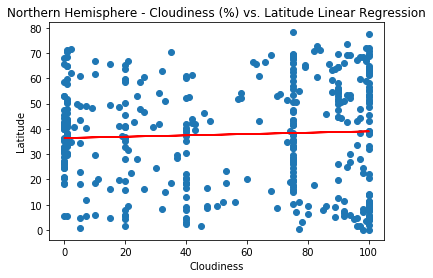

In [27]:
# SETUP PLOT FIGURE
fig, ax9 = plt.subplots(figsize=(6,4))

# SET LABELS
x_values = northern_weather_df['Cloudiness']
y_values = northern_weather_df['Lat']
ax9.set_xlabel('Cloudiness')
ax9.set_ylabel('Latitude')
ax9.set_title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')

plt.scatter(x_values, y_values)

# LINEAR REGRESSION
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

plt.savefig("Scatter9.png", bbox_inches='tight', dpi=600)

print(f"The r-squared is: {rvalue**2}")

Based on the sample, it appears that though cloudiness is mostly evenly distributed, there are more cities with high cloudiness closer to the equator. Perhaps in more tropical regions.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.00040316216224374056


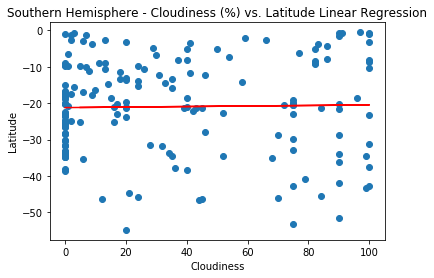

In [28]:
# SETUP PLOT FIGURE
fig, ax10 = plt.subplots(figsize=(6,4))

# SET LABELS
x_values = southern_weather_df['Cloudiness']
y_values = southern_weather_df['Lat']
ax10.set_xlabel('Cloudiness')
ax10.set_ylabel('Latitude')
ax10.set_title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')

plt.scatter(x_values, y_values)

# LINEAR REGRESSION
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

plt.savefig("Scatter10.png", bbox_inches='tight', dpi=600)

print(f"The r-squared is: {rvalue**2}")

Based on the sample, it appears that there are less cloudy cities in the Southern Hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.00030985245033274576


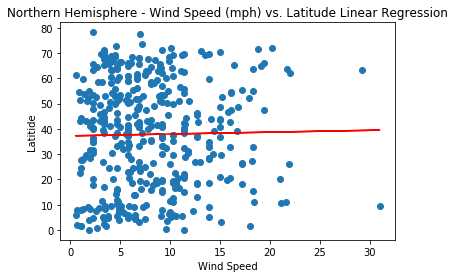

In [30]:
# SETUP PLOT FIGURE
fig, ax11 = plt.subplots(figsize=(6,4))

# SET LABELS
x_values = northern_weather_df['Wind Speed']
y_values = northern_weather_df['Lat']
ax11.set_xlabel('Wind Speed')
ax11.set_ylabel('Latitide')
ax11.set_title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')

plt.scatter(x_values, y_values)

# LINEAR REGRESSION
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

plt.savefig("Scatter11.png", bbox_inches='tight', dpi=600)

print(f"The r-squared is: {rvalue**2}")

Based on the sample, it appears that wind speeds tend to stay below 15mph in the Northern Hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.00963961896910126


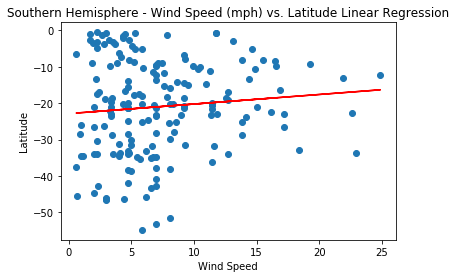

In [31]:
# SETUP PLOT FIGURE
fig, ax12 = plt.subplots(figsize=(6,4))

# SET LABELS
x_values = southern_weather_df['Wind Speed']
y_values = southern_weather_df['Lat']
ax12.set_xlabel('Wind Speed')
ax12.set_ylabel('Latitude')
ax12.set_title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')

plt.scatter(x_values, y_values)

# LINEAR REGRESSION
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

plt.savefig("Scatter12.png", bbox_inches='tight', dpi=600)

print(f"The r-squared is: {rvalue**2}")

Based on the sample, it appears that wind speeds tend to stay below 15mph in the Southern Hemisphere.